<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "095a21c789eb4728fde2b29230033273"

!kaggle datasets download meetnagadia/human-action-recognition-har-dataset

 99% 295M/297M [00:08<00:00, 38.4MB/s]
100% 297M/297M [00:08<00:00, 36.0MB/s]


In [2]:
!unzip human-action-recognition-har-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Recognition/

In [3]:
# PIL
# opencv

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import torch
from torch import nn
from torchvision import transforms
from torch.utils import data
import torchvision.datasets as datasets

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **Explore Dataset**

In [6]:
train_path = "Human Action Recognition/train"
test_path = "Human Action Recognition/test"

In [7]:
random_img = train_path + "/" + "Image_5.jpg"

In [8]:
img = cv2.imread(random_img)

In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(210, 240, 3)

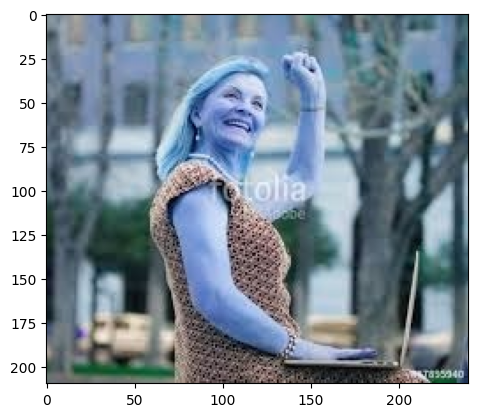

In [11]:
plt.imshow(img)
plt.show()

In [12]:
df = pd.read_csv("Human Action Recognition/Training_set.csv")

In [13]:
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [14]:
pd.value_counts(df['label'])

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [15]:
class_names = pd.value_counts(df['label']).index

In [16]:
class_names = np.sort(class_names)
print(class_names)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [17]:
df.iloc[545]

filename    Image_546.jpg
label             hugging
Name: 545, dtype: object

In [18]:
filenames = df['filename'].values

In [19]:
filenames[:10]

array(['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg',
       'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg',
       'Image_9.jpg', 'Image_10.jpg'], dtype=object)

In [20]:
df['label'][0]

'sitting'

In [21]:
# transform = transforms.Compose([transforms.ToTensor()])

def load_data(path, df):
  images_list = []
  labels_list = []
  for i in tqdm(range(len(filenames))):
    # concat train_path with image name
    img_path = path + "/" + filenames[i]
    # fetch image label from data frame of current image
    img_label = df['label'][i]
    # read image using opencv
    img = cv2.imread(img_path)
    # resize image because images might be of different dimensions
    # in order to maintain array, we have to resize all the images in same dimension
    # img = cv2.resize(img, (150,150))
    # img = transform(img)
    # img = img / 255.0
    # store images one by one in your list
    images_list.append(img)
    labels_list.append(img_label)

  images_arr = np.asarray(images_list)
  labels_arr = np.asarray(labels_list)

  return images_arr, labels_arr

In [22]:
train_df = pd.read_csv("Human Action Recognition/Training_set.csv")
# test_df = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [23]:
# test_df.head()

In [24]:
train_images, train_labels = load_data(train_path, train_df)

100%|██████████| 12600/12600 [00:11<00:00, 1087.43it/s]
<ipython-input-21-cb6c06e5bad2>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_arr = np.asarray(images_list)


In [25]:
train_images.shape

(12600,)

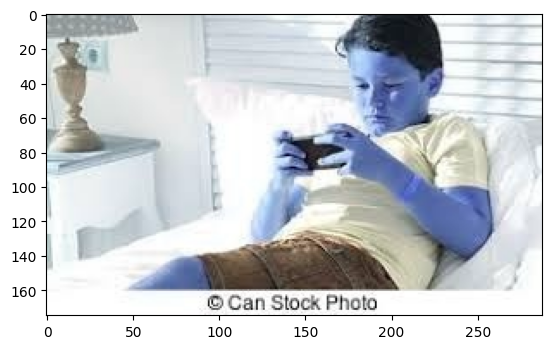

In [26]:
plt.imshow(train_images[1670])
plt.show()

In [27]:
train_labels[0]

'sitting'

In [28]:
# Inherit Dataset class coming from data package
class Dataset(data.Dataset):
  def __init__(self, images, labels):
    self.transforms = transforms
    self.images = images
    self.labels = labels

  def __len__(self):
    return len(self.images)

  def __getitem__(self, index):
    # loading data - one image at a time
    X = self.images[index]
    X = cv2.resize(img,(227,227))
    y = self.labels[index]
    transform = transforms.Compose([transforms.ToTensor()])
    X = transform(X)
    # X = torch.tensor(X)
    # X = torch.cat((X,X,X),0)
    return X, y

In [29]:
np.unique(train_labels, return_counts=True)

(array(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating',
        'fighting', 'hugging', 'laughing', 'listening_to_music', 'running',
        'sitting', 'sleeping', 'texting', 'using_laptop'], dtype='<U18'),
 array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
        840, 840]))

In [30]:
label = LabelEncoder()
train_labels = label.fit_transform(train_labels)

In [31]:
np.unique(train_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
        840, 840]))

In [32]:
# 75% - training and 25% - testing
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.25)

In [33]:
x_train.shape

(9450,)

In [34]:
x_test.shape

(3150,)

In [35]:
params = {"batch_size":32, "shuffle":True}

training_set = Dataset(x_train, y_train)
training_generator = data.DataLoader(training_set, **params)

test_set = Dataset(x_test, y_test)
test_generator = data.DataLoader(test_set, **params)

In [36]:
# Normalization
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [45]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=15):
    super().__init__()
    self.cnn_blocks = nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 384, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 256, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
    )
    self.fcn_blocks = nn.Sequential(
        nn.Linear(1024, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.cnn_blocks(x)
    x = torch.flatten(x,1)
    x = self.fcn_blocks(x)
    return x

In [46]:
model = AlexNet()

In [47]:
model

AlexNet(
  (cnn_blocks): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fcn_blocks): Sequential(
    (0): Linear(in_features=1024, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=4096, out_features=15

In [48]:
def accuracy(y_true, y_pred):
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

In [49]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [50]:
type(x_train)

numpy.ndarray

In [53]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Evaluation metric
def accuracy(y_true, y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

def train_step(epoch, model, data, loss_fn, optimizer):
  train_loss, train_acc = 0,0
  model.to(device)

  for batch, (X, y) in enumerate(data):
    X,y = X.to(device), y.to(device)

    # Feedforward - it calls forward method inside Model Class
    y_pred = model(X)
    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy(y, y_pred.argmax(dim=1))

    # Backpropagate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data)
  train_acc /= len(data)
  train_acc_history.append(train_acc)
  train_loss_history.append(train_loss)
  print(f"Epoch : {epoch} | Train Loss : {train_loss:.3f} |  Train Acc : {train_acc:.3f}")


def test_step(epoch, model, data, loss_fn, optimizer):
  test_loss, test_acc = 0,0
  model.to(device)
  model.to(eval)

  with torch.inference_mode():
    for batch, (X, y) in enumerate(data):
      X,y = X.to(device), y.to(device)

      # Feedforward - it calls forward method inside Model Class
      y_pred = model(X)
      # Calculate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss
      test_acc += accuracy(y, y_pred.argmax(dim=1))

    test_loss /= len(data)
    test_acc /= len(data)
    print(f"Epoch : {epoch} | Test Loss : {test_loss:.3f} |  Test Acc : {test_acc:.3f}")

In [54]:
model = AlexNet().to(device)
model.to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
loss_function = nn.CrossEntropyLoss()

train_acc_history = []
train_loss_history = []

epochs = 20

for epoch in tqdm(range(epochs)):
  train_step(epoch, model, training_generator, loss_function, optimizer)
  # test_step(epoch, model, test_generator, loss_function, optimizer)

  5%|▌         | 1/20 [00:09<03:06,  9.83s/it]

Epoch : 0 | Train Loss : 2.709 |  Train Acc : 6.286


 10%|█         | 2/20 [00:19<02:53,  9.64s/it]

Epoch : 1 | Train Loss : 2.709 |  Train Acc : 6.294


 15%|█▌        | 3/20 [00:29<02:44,  9.68s/it]

Epoch : 2 | Train Loss : 2.708 |  Train Acc : 6.738


 20%|██        | 4/20 [00:38<02:35,  9.73s/it]

Epoch : 3 | Train Loss : 2.708 |  Train Acc : 6.717


 25%|██▌       | 5/20 [00:48<02:26,  9.74s/it]

Epoch : 4 | Train Loss : 2.708 |  Train Acc : 6.746


 30%|███       | 6/20 [00:58<02:16,  9.73s/it]

Epoch : 5 | Train Loss : 2.708 |  Train Acc : 6.611


 35%|███▌      | 7/20 [01:07<02:05,  9.65s/it]

Epoch : 6 | Train Loss : 2.708 |  Train Acc : 6.736


 35%|███▌      | 7/20 [01:12<02:13, 10.29s/it]


KeyboardInterrupt: ignored